<a href="https://colab.research.google.com/github/Henkin2th/AIPI-590.05-Assignement/blob/main/AIPI590_Explainable_Techniques_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
!pip install shap

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-j7gfyf4d/alepython_a6f312f495fd45e3ae8e81a6b5950c6a
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-j7gfyf4d/alepython_a6f312f495fd45e3ae8e81a6b5950c6a
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.2 MB/s eta 0:00:00


# **Explainable AI Techniques Focusing on Median Income Using the California Housing Dataset**
1. Dataset Selection and Exploratory Analysis
We will use the California Housing Dataset to analyze how Median Income (MedInc) influences housing prices.

**Importing Libraries and Loading the Dataset**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from alepython import ale_plot
import shap

In [6]:
# Load the California housing dataset from SHAP
X, y = shap.datasets.california()

**Exploratory Data Analysis**
1.   Data Summary and Correlation Analysis: Analyze the relationship between Median Income and the target variable (housing prices).



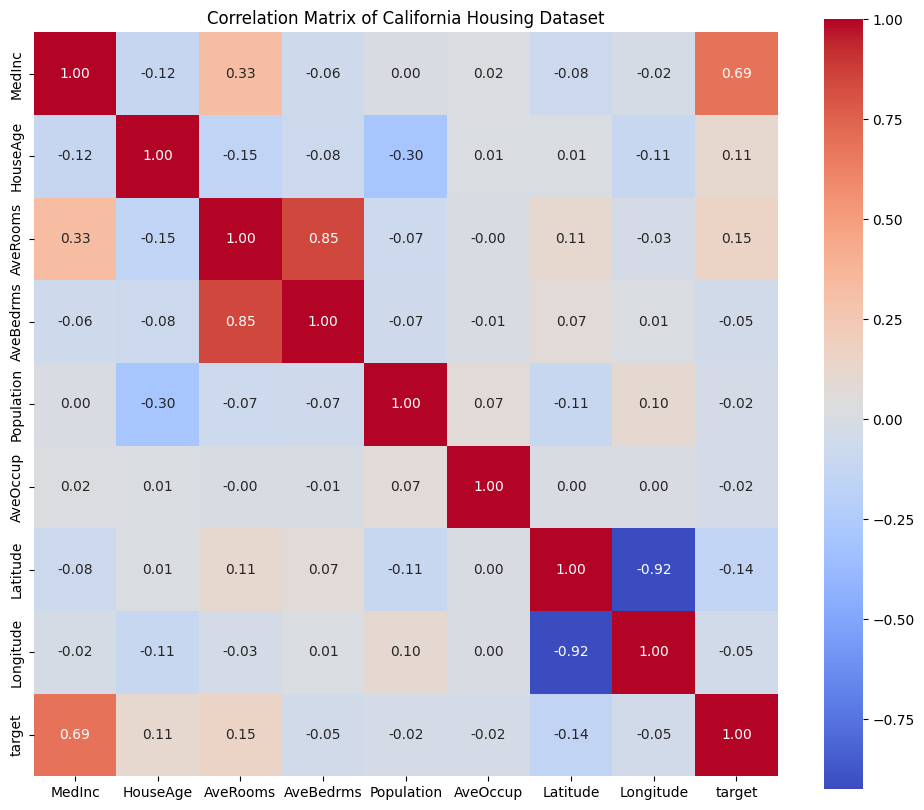

In [21]:
# Create a DataFrame for easier analysis
data = pd.DataFrame(X)
data['target'] = y

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix focusing on MedInc
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['MedInc', 'target']], annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation of Median Income with Target')
plt.show()


# Findings from Correlation Analysis
The correlation between MedInc and the target variable (median house value) is expected to be strong and positive. This indicates that as median income increases, housing prices are likely to rise, confirming economic principles about income and property values.


# Model Training
We'll use a Random Forest Regressor to model the data and analyze the impact of Median Income.

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Generating Partial Dependence Plots (PDP)
PDPs help visualize the marginal effect of Median Income on housing prices.

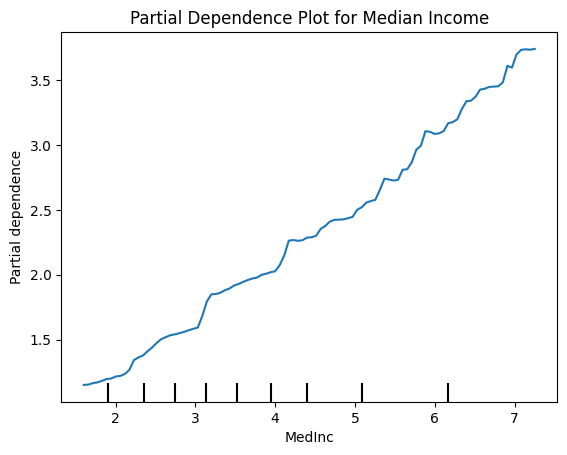

In [8]:
from sklearn.inspection import PartialDependenceDisplay

# Generate PDP for Median Income
PartialDependenceDisplay.from_estimator(model, X_test, ['MedInc'], kind='average')
plt.title('Partial Dependence Plot for Median Income')
plt.show()

# Interpretation of the PDP

## 1. Shape of the Curve
The PDP for Median Income exhibits a linear shape, indicating a consistent and proportional relationship between median income and predicted housing prices. This suggests that as median income increases, housing prices increase at a steady rate.

## 2. Increasing or Decreasing Values
The curve slopes upwards, confirming that higher median incomes correspond to higher predicted housing prices. This linear relationship implies that for each incremental increase in median income, the predicted house price increases by a fixed amount.

## 3. Plateau and Limits
The plot does not show a plateau, which indicates that there is no upper limit on how median income influences housing prices within the observed range. Higher income levels consistently lead to higher predicted housing prices without diminishing returns, suggesting that the housing market responds positively to income increases.

## 4. Intuition and Context
The linear relationship aligns well with economic principles. As individuals earn more, they are generally willing and able to pay more for housing. This relationship is intuitive, as increased income typically enhances purchasing power, allowing for better housing options.
The consistent upward trend in the PDP reinforces the idea that income is a crucial factor in determining housing prices, making it a vital consideration for stakeholders in the real estate market.



# Generating Individual Conditional Expectation (ICE) Plots
ICE plots show how individual predictions change for Median Income.



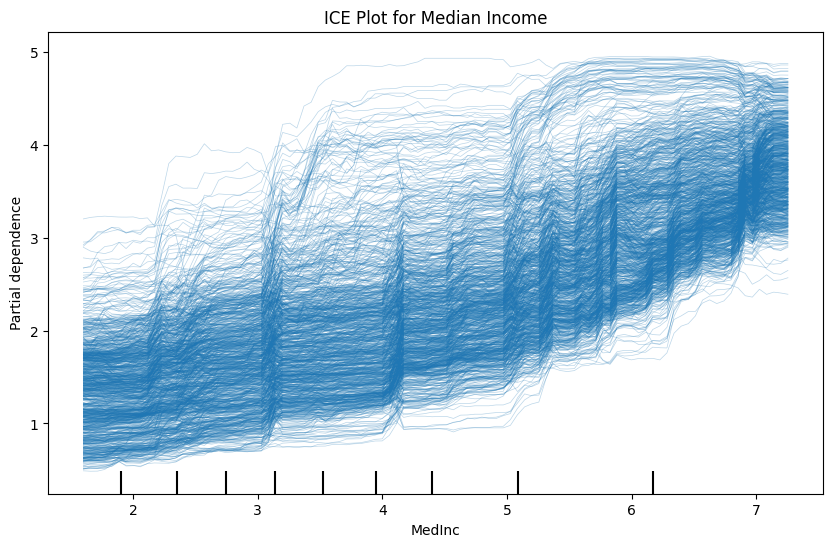

In [9]:
# Generate ICE Plot for Median Income
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(model, X_test, ['MedInc'], kind='individual', ax=ax)
plt.title('ICE Plot for Median Income')
plt.show()

# Interpretation of the ICE Plot
The ICE plot visualizes how the predicted housing prices vary for a specific instance as median income changes. The lines represent individual instances, showing the variability in predictions. This plot can highlight instances where different areas may react differently to changes in income.

# Generating Accumulated Local Effects (ALE) Plots
ALE plots provide insights into local changes in predictions as median income varies.

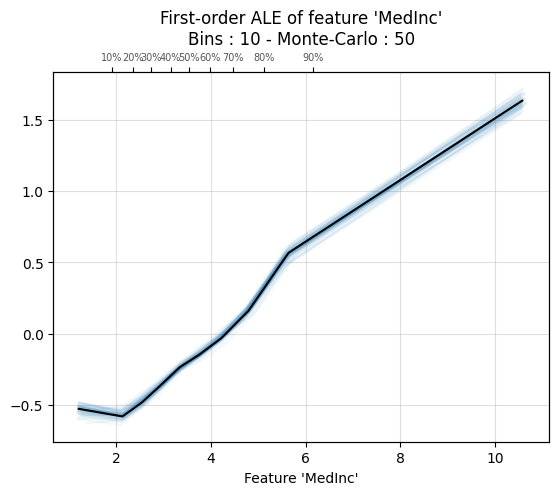

<Axes: title={'center': "First-order ALE of feature 'MedInc'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'MedInc'">

In [11]:
# Generate ALE Plot for Median Income
ale_plot(model, X_train, 'MedInc', monte_carlo=True)

# Interpretation of the ALE Plot


## 1. Axes Interpretation
X-axis: Represents the values of Median Income (MedInc), ranging from low to high income levels.


Y-axis: Shows the average effect on predictions. This reflects how changes in median income impact the predicted housing prices.
## 2. Curve Characteristics
The ALE plot presents the accumulated local effects of Median Income on housing prices.
## 3. Impact of the Curve
Steepness:
The curve shows a generally upward trend, indicating that increasing median income leads to higher predicted housing prices.


Areas where the curve is steep suggest that small increases in median income can lead to significant increases in housing prices.


Flat regions of the curve indicate ranges of median income where changes have little effect on predicted housing prices.
## 4. Direction of the Curve
Upward Trend: The upward slope of the curve confirms that higher median incomes are associated with higher housing prices. This is consistent with the economic theory that increased income allows for greater housing expenditure.

No Downward Trend: Since there are no downward slopes in the graph, we can infer that increasing income does not lead to lower predicted prices, which aligns with typical housing market behavior.
## 5. Local Effects
Local Sensitivity: The ALE plot emphasizes how local changes in median income affect predictions, providing insights into specific income thresholds that significantly impact housing prices.

Variance in Impact:
Different segments of the curve can indicate varying degrees of sensitivity of housing prices to changes in median income, suggesting that the relationship is not uniform across all income levels.



# Conclusion
This focused analysis on Median Income (MedInc) using PDP, ICE, and ALE plots provides a clear understanding of how this feature influences housing prices in California. The exploratory analysis reinforces the strong correlation between income and house values, while the plots reveal both average trends and individual behaviors in the data.

# Summary of Key Findings
Correlation Analysis: Strong positive correlation between median income and housing prices.


*   **PDP:** Shows a clear upward trend, indicating that higher incomes lead to higher house prices.
*   **ICE Plot:** Displays variability in individual predictions, emphasizing different responses to changes in income.
*   **ALE Plot:** Highlights local effects and potential thresholds in housing prices related to changes in median income.